https://github.com/fastai/imagenet-fast/tree/master/cifar10/dawn_submission

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from fastai.conv_learner import *
PATH = Path("data/cifar_full/")

In [4]:
from torchvision import transforms, datasets

In [5]:
torch.backends.cudnn.benchmark = True

In [6]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

We construct the data object manually from low level components in a way that can be used with the fastai library.

In [7]:
def get_loaders(bs, num_workers):
    traindir = str(PATH/'train')
    valdir = str(PATH/'test')
    tfms = [transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]

    train_dataset = datasets.ImageFolder(
        traindir,
        transforms.Compose([
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
        ] + tfms))

    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=bs, shuffle=True, num_workers=num_workers, pin_memory=True)

    val_dataset = datasets.ImageFolder(valdir, transforms.Compose(tfms))

    val_loader = torch.utils.data.DataLoader(
        val_dataset, batch_size=bs*2, shuffle=False, num_workers=num_workers, pin_memory=True)
    
    return train_loader, val_loader

In [8]:
def get_data(bs, num_workers):
    data = ModelData(PATH, *get_loaders(bs, num_workers))
    data.sz=32
    return data

In [9]:
from models.wideresnet import wrn_22
from models.wideresnet_new import wrn_22 as wrn_22_fastai

In [10]:
def get_learner(arch, bs):
    learn = ConvLearner.from_model_data(arch.cuda(), get_data(bs, num_cpus()))
    learn.crit = nn.CrossEntropyLoss()
    learn.metrics = [accuracy]
    return learn

epoch      trn_loss   val_loss   accuracy                 
    0      2.272702   50465.642  0.1       



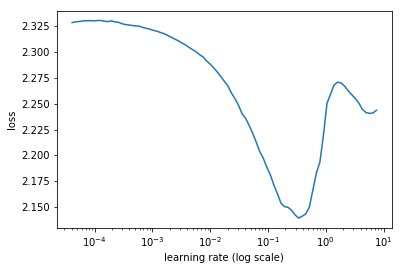

In [11]:
learn = get_learner(wrn_22(), 512)
learn.lr_find(wds=1e-4)
learn.sched.plot(n_skip_end=1)

In [12]:
%time learn.fit(1.5, 1, wds=1e-4, cycle_len=30, use_clr_beta=(15, 10, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      1.54632    1.758049   0.4417    
    1      1.148196   1.41751    0.5426                   
    2      0.897569   1.187317   0.6149                    
    3      0.731843   1.112643   0.6252                    
    4      0.629387   0.841191   0.7264                    
    5      0.546307   0.924863   0.7016                    
    6      0.482344   0.796186   0.7527                    
    7      0.457564   1.020069   0.706                     
    8      0.413988   0.494562   0.8296                    
    9      0.387668   0.489906   0.8361                    
    10     0.37038    0.472724   0.8452                    
    11     0.343563   0.719972   0.7794                    
    12     0.335275   0.77779    0.7792                    
    13     0.322985   0.691986   0.7839                    
    14     0.307528   0.62598    0.7996                    
    15     0.294344   0.769548   0.7672                   

[array([0.22549]), 0.9394999990463256]

epoch      trn_loss   val_loss   accuracy                 
    0      2.091661   5599.34583 0.1091    



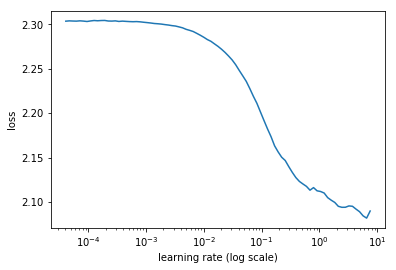

In [13]:
learn = get_learner(wrn_22_fastai(), 512)
learn.lr_find(wds=1e-4)
learn.sched.plot(n_skip_end=1)

In [14]:
%time learn.fit(1.5, 1, wds=1e-4, cycle_len=30, use_clr_beta=(15, 10, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      1.485603   1.647206   0.4718    
    1      1.09282    1.292543   0.5971                   
    2      0.848489   1.05721    0.651                     
    3      0.688327   0.736313   0.7396                    
    4      0.580463   0.870901   0.7192                    
    5      0.510906   0.735299   0.7567                    
    6      0.458746   0.789451   0.7499                    
    7      0.424685   0.650107   0.786                     
    8      0.396697   0.842739   0.749                     
    9      0.373568   0.674263   0.7814                    
    10     0.361591   0.653711   0.7922                    
    11     0.342615   0.703106   0.7773                    
    12     0.327934   0.651241   0.7866                    
    13     0.321877   1.002682   0.7185                    
    14     0.29558    0.947207   0.7604                    
    15     0.286036   0.551066   0.827                    

[array([0.22716]), 0.935799999332428]

In [15]:
learn = get_learner(wrn_22(), 512)
%time learn.fit(1.5, 1, wds=1e-4, cycle_len=30, use_clr_beta=(15, 10, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      1.566746   2.617527   0.3406    
    1      1.152544   1.740531   0.4739                   
    2      0.865227   1.125154   0.6602                    
    3      0.704891   0.891372   0.7048                    
    4      0.591438   0.635892   0.7862                    
    5      0.53332    0.667474   0.7706                    
    6      0.474567   0.716693   0.7666                    
    7      0.430691   0.747877   0.7569                    
    8      0.409555   0.771468   0.7575                    
    9      0.383449   0.623755   0.7953                    
    10     0.366076   0.985852   0.7369                    
    11     0.349054   0.555456   0.82                      
    12     0.329025   0.576531   0.8189                    
    13     0.318327   1.219095   0.7069                    
    14     0.310171   0.775196   0.7768                    
    15     0.292594   1.112627   0.6897                   

[array([0.23023]), 0.9382999988555908]

In [16]:
learn = get_learner(wrn_22_fastai(), 512)
%time learn.fit(1.5, 1, wds=1e-4, cycle_len=30, use_clr_beta=(15, 10, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      1.51713    1.934942   0.4056    
    1      1.096802   1.387031   0.5601                   
    2      0.850848   0.930704   0.6912                    
    3      0.694662   1.117699   0.6276                    
    4      0.589634   0.660925   0.7711                    
    5      0.52382    0.680015   0.7737                    
    6      0.4606     1.052155   0.6883                    
    7      0.431222   0.64079    0.7911                    
    8      0.404906   0.845367   0.7288                    
    9      0.378109   0.693618   0.7743                    
    10     0.357653   0.612464   0.8126                    
    11     0.343765   0.837646   0.7458                    
    12     0.322995   0.687247   0.7878                    
    13     0.311618   0.686856   0.7873                    
    14     0.298722   0.532595   0.826                     
    15     0.286199   0.929134   0.7645                   

[array([0.22084]), 0.9389000015258789]

In [12]:
learn = get_learner(wrn_22(), 512)

In [21]:
%%time
# learn.fit(1, 1, wds=1e-4, cycle_len=1, use_clr_beta=(15, 10, 0.95, 0.85))
learn.fit(1.5, 1, wds=1e-4, cycle_len=15, use_clr_beta=(15, 10, 0.95, 0.85))

 24%|██▍       | 24/98 [00:08<00:26,  2.77it/s, loss=2]   
epoch      trn_loss   val_loss   accuracy                 
    0      1.614407   1.919485   0.3826    
    1      1.208094   1.80926    0.4465                   
    2      0.908906   1.189822   0.6017                    
    3      0.695331   0.730434   0.7496                    
    4      0.519507   0.490678   0.8324                    



epoch      trn_loss   val_loss   accuracy                  
    0      0.523462   0.593778   0.7965    
    1      0.529916   0.765451   0.7591                    
    2      0.507796   0.707556   0.7718                    
    3      0.476443   1.148865   0.691                     
    4      0.441479   0.709112   0.7763                    
    5      0.413202   0.785423   0.764                     
    6      0.386066   0.738385   0.7689                    
    7      0.353988   0.569757   0.8228                    
    8      0.330398   0.625857   0.8036                    
    9      0.303856   0.466257   0.8498                    
    10     0.277266   0.454301   0.8549                    
    11     0.232513   0.359652   0.8877                    
    12     0.179795   0.361886   0.8828                    
    13     0.119286   0.257216   0.9191                    
    14     0.078965   0.234881   0.9267                     

CPU times: user 7min 54s, sys: 4min 24s, total: 12min 

In [ ]:
%%time
# learn.fit(1, 1, wds=1e-4, cycle_len=1, use_clr_beta=(15, 10, 0.95, 0.85))
learn.fit(1.5, 1, wds=1e-4, cycle_len=20, use_clr_beta=(15, 10, 0.95, 0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      1.600974   1.903397   0.4441    
 61%|██████    | 60/98 [00:21<00:13,  2.82it/s, loss=1.32]